# Instagram - Analysis 
## Leverage public raw data to meanigfull insights.
The scope of the analysis is to demonstrate the parsing of a scraped .json file from an instagram account. 

###  Loading the data. 

In [2]:
import pandas as pd
import itertools
from IPython.display import Image 
import urllib.request

In [3]:
#Load the data
import json
with open("./profiles/itsnotdimitra_2019-06-03 02-22-49.json") as json_file:  
    data = json.load(json_file)

### Let's take a look on what we have so far

In [4]:
#Preview the data
dict(list(data.items())[0:9])

{'alias': '𝓓🌙𝓶𝓲𝓽𝓻𝓪',
 'username': 'itsnotdimitra',
 'bio': '𝒽ℯ𝓎𝓎',
 'prof_img': 'https://instagram.fzgh1-1.fna.fbcdn.net/vp/6717fc4e534a8ae8fc202dedea3b0372/5D9DCA33/t51.2885-19/s320x320/60735004_2369644886420036_5968947421139435520_n.jpg?_nc_ht=instagram.fzgh1-1.fna.fbcdn.net',
 'num_of_posts': 29,
 'followers': {'count': 867},
 'following': {'count': 518},
 'bio_url': '',
 'isprivate': False}

### Data is there, but still a bit messy. Let's make things clear.

#### Profile Details

In [5]:
print("Alias:",data.get("alias"))
print(".....")
print("Username:",data.get("username"))
print(".....")
print("Eye-catching bio:",data.get("bio"))
print(".....")
print("Number of followers:",data.get("followers").get("count"))
print(".....")
print("Number of following:",data.get("following").get("count"))
print(".....")
print("Number of amazing posts:",data.get("num_of_posts"))

Alias: 𝓓🌙𝓶𝓲𝓽𝓻𝓪
.....
Username: itsnotdimitra
.....
Eye-catching bio: 𝒽ℯ𝓎𝓎
.....
Number of followers: 867
.....
Number of following: 518
.....
Number of amazing posts: 29


### Wow... that looks good. What about asking some questions to the dataset?

Let's fetch the names of the likes across all posts.

In [6]:
likers=[]
for i in range(0,24):
    likers.append(data.get("posts")[i]["likes"]["list"])
unique_likers=(set(list(itertools.chain.from_iterable(likers))))

In [7]:
print("Number of unique usernames:",len(unique_likers))

Number of unique usernames: 1619


That's a bit tricky. While the number of followers is 867, the list of likes sums up to 1619 users. So 752 profiles  don't follow the account but still like the content. 

### Now it's time to find out the loyal profiles that liked the majority of the posts. 
### Let's get started!

In [8]:
names=[]
count=[]
for name in unique_likers:
    j=0
    for i in range(0,24): 
        if name in likers[i]:
            j+=1
    names.append(name)
    count.append(j)     
df=pd.DataFrame({'Names': names,'Count': count})
df=df.sort_values(by="Count",ascending=False).reset_index(drop=True)

### Print the 10 most loyal profiles.

In [9]:
df[:10]

,Names,Count
0,zoiparlakoglou,24
1,annakalogianni,24
2,despoina_vas,24
3,stavroulapapa,24
4,vic_gb_,24
5,sarantis_koilanitis,23
6,niki_smpr,23
7,__onnellisuus,23
8,stav_tsaki,23
9,anthi_tsag,22


## We have the winners,  <code>stavroulapapa</code>, <code>zoiparlakoglou</code> are among the profiles that liked every single post.

### For an influencer it is also important to be able to tell if a specific profile exists at the list of likes.
### Lets look at some examples. 

In [10]:
names_to_check=["stavroulapapa","sevixatzi","maria_lagopoulou","dinaras_0"]
for i in names_to_check:
    print(f"The profile {i} exists:",i in unique_likers)
    print("...")

The profile stavroulapapa exists: True
...
The profile sevixatzi exists: True
...
The profile maria_lagopoulou exists: False
...
The profile dinaras_0 exists: False
...


### It is evident that the profile  <code>dinaras_0</code> has been blocked, thus removed from the list.

### The last step is to automate the proceess of downloading all the posts and save them to a local directory.

In [11]:
def downloader(image_url,name):
    full_file_name = "./instagram-profilecrawl/Downloads/"+str(name)+ ".jpg"
    urllib.request.urlretrieve(str(image_url),str(full_file_name))

### Great job, now we can also print inline the post with most likes!

In [13]:
for i in range(0,24):
    print(i,":",data.get("posts")[i]["likes"]["count"])

0 : 221
1 : 260
2 : 157
3 : 199
4 : 207
5 : 269
6 : 281
7 : 231
8 : 180
9 : 213
10 : 260
11 : 243
12 : 160
13 : 196
14 : 212
15 : 248
16 : 136
17 : 296
18 : 200
19 : 307
20 : 266
21 : 228
22 : 127
23 : 362


## Post 23 is the winner!

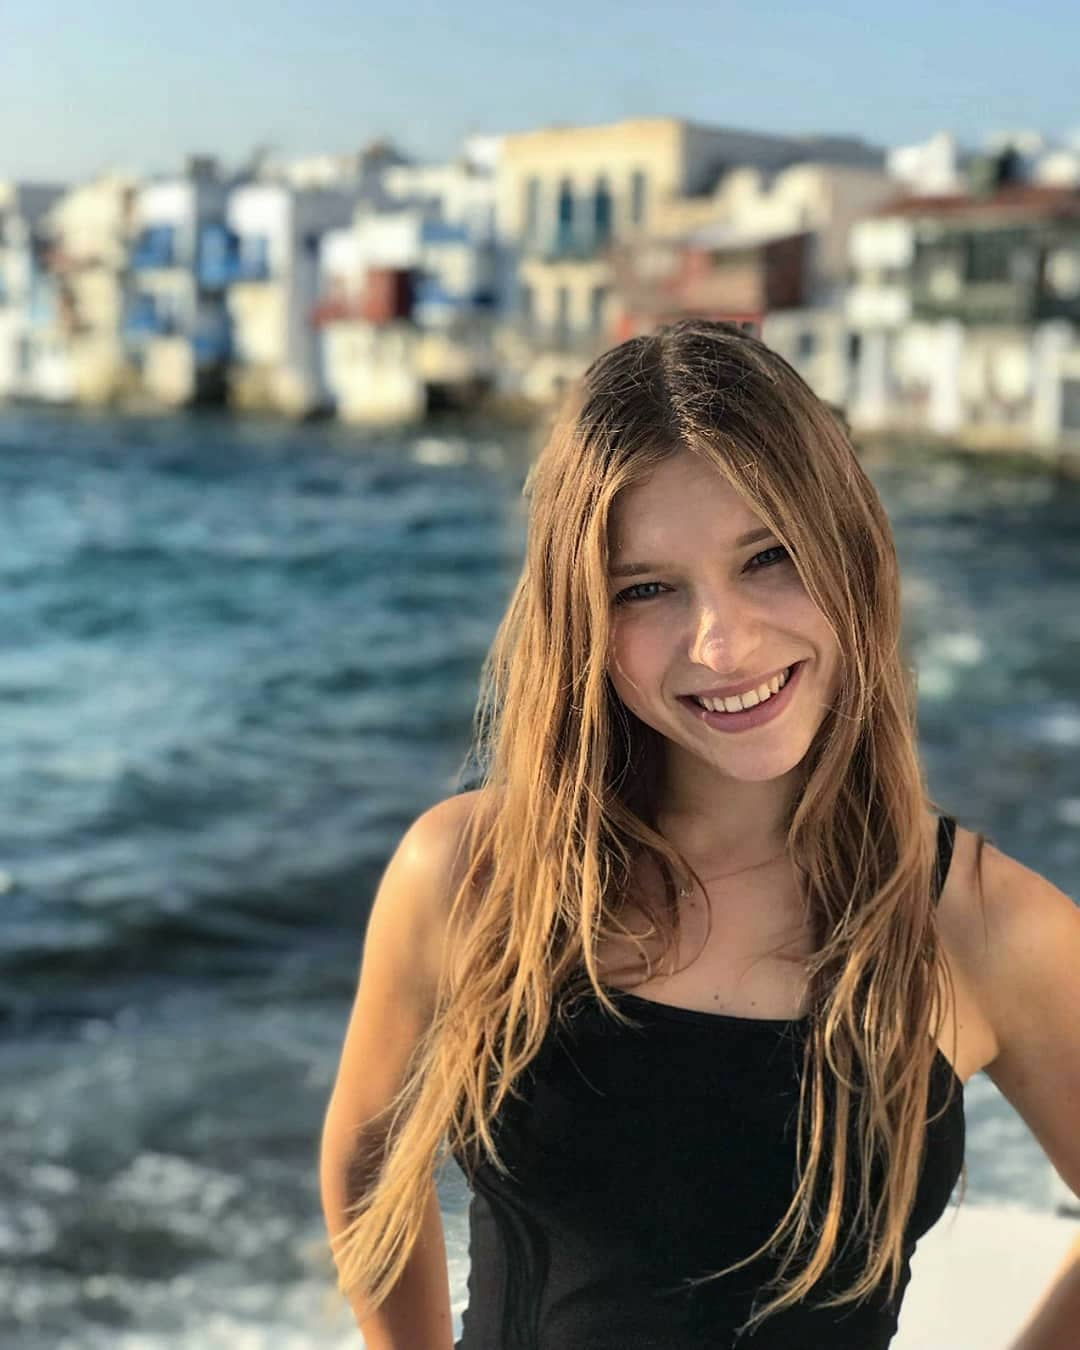

In [69]:
Image(filename='../instagram-profilecrawl/Downloads/23.jpg')

# That's all for now folks! 
# Hope you enjoyed , and stay tuned. 